# Experimento 1: _GridSearch_ no KNN

- Busca em grade para ```k``` variando de: $[3:7]$;
- Pensar em como mostrar acerto por frequência do motor;

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

## Carregando dados

In [2]:
fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

GS_VALUES = {'kneighborsclassifier__n_neighbors':np.arange(3, 8)}

## Busca em grade

In [3]:
results = GridSearchCV(estimator=pipe, param_grid=GS_VALUES)\
    .fit(X=fs20_df.values, y=target_s.values)\
        .cv_results_

results_df = pd.DataFrame(results)
results_df.to_csv('./csvs/04-gs_knn.csv')
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044434,0.065990,0.091866,0.020375,3,{'kneighborsclassifier__n_neighbors': 3},0.485549,0.843629,0.756757,0.785714,0.725869,0.719504,0.123251,1
1,0.010969,0.002309,0.081288,0.009728,4,{'kneighborsclassifier__n_neighbors': 4},0.464355,0.822394,0.793436,0.764479,0.704633,0.709859,0.128788,3
2,0.010720,0.001124,0.068140,0.006486,5,{'kneighborsclassifier__n_neighbors': 5},0.475915,0.822394,0.770270,0.783784,0.702703,0.711013,0.123736,2
3,0.009515,0.001365,0.072942,0.004559,6,{'kneighborsclassifier__n_neighbors': 6},0.473988,0.793436,0.770270,0.735521,0.731660,0.700975,0.115766,4
4,0.009584,0.001368,0.072020,0.010356,7,{'kneighborsclassifier__n_neighbors': 7},0.473988,0.791506,0.731660,0.743243,0.727799,0.693639,0.112158,5


param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
3,0.719504,0.123251,1
4,0.709859,0.128788,3
5,0.711013,0.123736,2
6,0.700975,0.115766,4
7,0.693639,0.112158,5


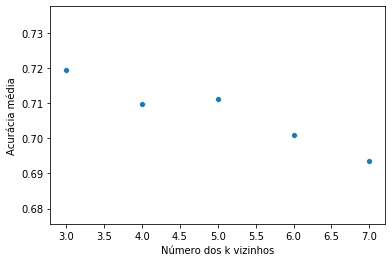

In [4]:
sns.scatterplot(data=results_df, x='param_kneighborsclassifier__n_neighbors', y='mean_test_score')\
    .set(xlabel='Número dos k vizinhos', ylabel='Acurácia média', style='darkgrid')

results_df[['param_kneighborsclassifier__n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].style.hide_index()